In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18, 5)

from plotting import smooth
from student_env import StudentEnv  # The student simulator env
from agents import RandomAgent, WeakestSkillAgent, MultiArmBanditEpsilonGreedy, MultiArmBanditEpsilonSampleProb

# Helper functions

In [2]:
def run_agent(env, agent, train_eps=1000, test_eps=100, print_episodes=100):
    train_rewards = np.zeros((train_eps, env.max_steps))
    test_rewards = np.zeros((test_eps, env.max_steps))
    
    for episode in range(train_eps):
        env.reset()
        action = 0 # Just need a first action to do something
        done = False

        if episode % print_episodes == 0:
            print(f"Epsiode {episode}")

        while not done:
            state, reward, done, info = env.step(action)
            train_rewards[episode, env.i-1] = reward
            action = agent(state, reward, done, info)

    for episode in range(test_eps):
        env.reset()
        action = 0 # Just need a first action to do something
        done = False

        if episode % print_episodes == 0:
            print(f"Epsiode {episode}")

        while not done:
            state, reward, done, info = env.step(action)
            test_rewards[episode, env.i-1] = reward
            action = agent(state, reward, done, info)

    return agent, train_rewards, test_rewards

In [3]:
def plot_agent_run(rewards, title=None, w=1):
    # Get avg rewards
    avg_rewards = np.sum(rewards, axis=1)
    
    # Smooth data
    avg_rewards = smooth(avg_rewards, window_len=w) # window size w
    
    # Plot
    plt.plot(avg_rewards)
    if title:
        plt.title(title)
    plt.xlabel("Episodes")
    plt.ylabel(f"Reward (smooth = {w})")
    plt.show()

In [4]:
# Use the same environment spec (ie same students) for all agents to make comparing more fair
env = StudentEnv()

train_eps = 10000
test_eps = 1000

# Random Agent

In [5]:
env.reset()
rand_agent = RandomAgent(env.n_concepts)
rand_agent, rand_train_rewards, rand_test_rewards = run_agent(env, rand_agent, train_eps=0, test_eps=test_eps)


Epsiode 0
Epsiode 100
Epsiode 200
Epsiode 300
Epsiode 400
Epsiode 500
Epsiode 600
Epsiode 700
Epsiode 800
Epsiode 900


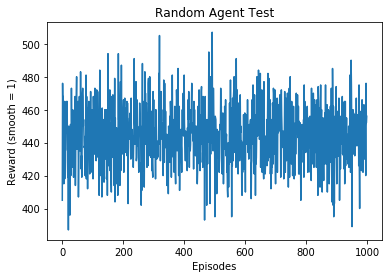

In [6]:
plot_agent_run(rand_test_rewards, "Random Agent Test")

# Weakest Skill Agent

In [7]:
env.reset()
ws_agent = WeakestSkillAgent(env.n_concepts)
ws_agent, ws_train_rewards, ws_test_rewards = run_agent(env, ws_agent, train_eps=0, test_eps=test_eps)


Epsiode 0
Epsiode 100
Epsiode 200
Epsiode 300
Epsiode 400
Epsiode 500
Epsiode 600
Epsiode 700
Epsiode 800
Epsiode 900


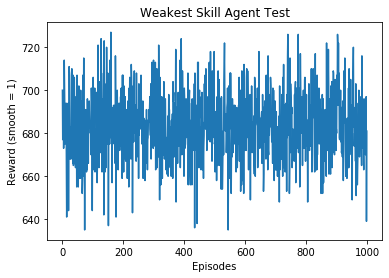

In [8]:
plot_agent_run(ws_test_rewards, "Weakest Skill Agent Test")

# Multi Arm Bandit Epsilon Greedy Agent

In [9]:
env.reset()
eg_agent = MultiArmBanditEpsilonGreedy(env.n_concepts)
eg_agent, eg_train_rewards, eg_test_rewards = run_agent(env, eg_agent, train_eps=train_eps, test_eps=test_eps)


Epsiode 0
Epsiode 100
Epsiode 200
Epsiode 300
Epsiode 400
Epsiode 500
Epsiode 600
Epsiode 700
Epsiode 800
Epsiode 900
Epsiode 1000
Epsiode 1100
Epsiode 1200
Epsiode 1300
Epsiode 1400
Epsiode 1500
Epsiode 1600
Epsiode 1700
Epsiode 1800
Epsiode 1900
Epsiode 2000
Epsiode 2100
Epsiode 2200
Epsiode 2300
Epsiode 2400
Epsiode 2500
Epsiode 2600
Epsiode 2700
Epsiode 2800
Epsiode 2900
Epsiode 3000
Epsiode 3100
Epsiode 3200
Epsiode 3300
Epsiode 3400
Epsiode 3500
Epsiode 3600
Epsiode 3700
Epsiode 3800
Epsiode 3900
Epsiode 4000
Epsiode 4100
Epsiode 4200
Epsiode 4300
Epsiode 4400
Epsiode 4500
Epsiode 4600
Epsiode 4700
Epsiode 4800
Epsiode 4900
Epsiode 5000
Epsiode 5100
Epsiode 5200
Epsiode 5300
Epsiode 5400
Epsiode 5500
Epsiode 5600
Epsiode 5700
Epsiode 5800
Epsiode 5900
Epsiode 6000
Epsiode 6100
Epsiode 6200
Epsiode 6300
Epsiode 6400
Epsiode 6500
Epsiode 6600
Epsiode 6700
Epsiode 6800
Epsiode 6900
Epsiode 7000
Epsiode 7100
Epsiode 7200
Epsiode 7300
Epsiode 7400
Epsiode 7500
Epsiode 7600
Epsiode 770

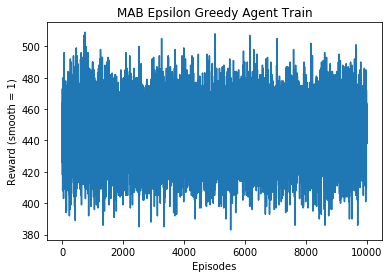

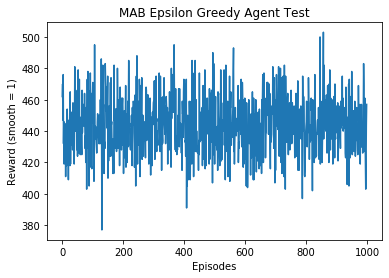

In [10]:
plot_agent_run(eg_train_rewards, "MAB Epsilon Greedy Agent Train", w=1)
plot_agent_run(eg_test_rewards, "MAB Epsilon Greedy Agent Test", w=1)

# Multi Arm Bandit Sample Q function Agent

In [11]:
env.reset()
sp_agent = MultiArmBanditEpsilonSampleProb(env.n_concepts)
sp_agent, sp_train_rewards, sp_test_rewards = run_agent(env, sp_agent, train_eps=train_eps, test_eps=test_eps)


Epsiode 0
Epsiode 100
Epsiode 200
Epsiode 300
Epsiode 400
Epsiode 500
Epsiode 600
Epsiode 700
Epsiode 800
Epsiode 900
Epsiode 1000
Epsiode 1100
Epsiode 1200
Epsiode 1300
Epsiode 1400
Epsiode 1500
Epsiode 1600
Epsiode 1700
Epsiode 1800
Epsiode 1900
Epsiode 2000
Epsiode 2100
Epsiode 2200
Epsiode 2300
Epsiode 2400
Epsiode 2500
Epsiode 2600
Epsiode 2700
Epsiode 2800
Epsiode 2900
Epsiode 3000
Epsiode 3100
Epsiode 3200
Epsiode 3300
Epsiode 3400
Epsiode 3500
Epsiode 3600
Epsiode 3700
Epsiode 3800
Epsiode 3900
Epsiode 4000
Epsiode 4100
Epsiode 4200
Epsiode 4300
Epsiode 4400
Epsiode 4500
Epsiode 4600
Epsiode 4700
Epsiode 4800
Epsiode 4900
Epsiode 5000
Epsiode 5100
Epsiode 5200
Epsiode 5300
Epsiode 5400
Epsiode 5500
Epsiode 5600
Epsiode 5700
Epsiode 5800
Epsiode 5900
Epsiode 6000
Epsiode 6100
Epsiode 6200
Epsiode 6300
Epsiode 6400
Epsiode 6500
Epsiode 6600
Epsiode 6700
Epsiode 6800
Epsiode 6900
Epsiode 7000
Epsiode 7100
Epsiode 7200
Epsiode 7300
Epsiode 7400
Epsiode 7500
Epsiode 7600
Epsiode 770

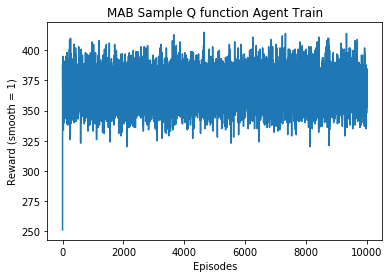

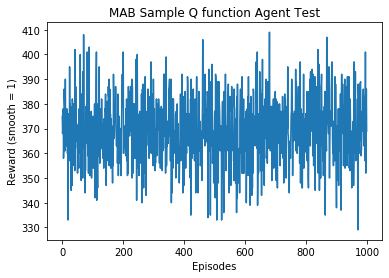

In [12]:
plot_agent_run(sp_train_rewards, "MAB Sample Q function Agent Train", w=1)
plot_agent_run(sp_test_rewards, "MAB Sample Q function Agent Test", w=1)

In [ ]:
[e for e in env.questions[:10]]

In [13]:
[q for q in sp_agent.q][:10]

[0.18428646633509302,
 0.05877742596650215,
 0.034783815281646466,
 0.13582759919188098,
 0.012962059410673878,
 0.012995481298863425,
 0.07765325291333271,
 0.01212037136441563,
 0.027711800912650526,
 0.04932315412393942,
 0.02802621593760363,
 0.017424188205505335,
 0.15237808175794781,
 0.033046772597134705,
 0.018337834559992345,
 0.07584556306397021,
 0.0,
 0.0,
 0.0,
 0.13492966245856194]

In [14]:
# Use the same environment spec (ie same students) for all agents to make comparing more fair
env = StudentEnv(n_students=1, n_concepts=5, n_questions=1000)

# Random Agent

In [15]:
env.reset()
rand_agent = RandomAgent(env.n_concepts)
rand_agent, rand_train_rewards, rand_test_rewards = run_agent(env, rand_agent, train_eps=0, test_eps=test_eps)


Epsiode 0
Epsiode 100
Epsiode 200
Epsiode 300
Epsiode 400
Epsiode 500
Epsiode 600
Epsiode 700
Epsiode 800
Epsiode 900


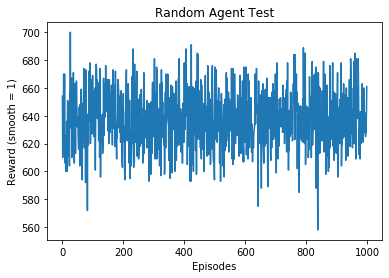

In [16]:
plot_agent_run(rand_test_rewards, "Random Agent Test")

# Weakest Skill Agent

In [17]:
env.reset()
ws_agent = WeakestSkillAgent(env.n_concepts)
ws_agent, ws_train_rewards, ws_test_rewards = run_agent(env, ws_agent, train_eps=0, test_eps=test_eps)


Epsiode 0
Epsiode 100
Epsiode 200
Epsiode 300
Epsiode 400
Epsiode 500
Epsiode 600
Epsiode 700
Epsiode 800
Epsiode 900


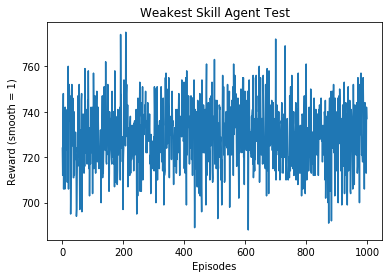

In [18]:
plot_agent_run(ws_test_rewards, "Weakest Skill Agent Test")

# Multi Arm Bandit Epsilon Greedy Agent

In [19]:
env.reset()
eg_agent = MultiArmBanditEpsilonGreedy(env.n_concepts)
eg_agent, eg_train_rewards, eg_test_rewards = run_agent(env, eg_agent, train_eps=train_eps, test_eps=test_eps)


Epsiode 0
Epsiode 100
Epsiode 200
Epsiode 300
Epsiode 400
Epsiode 500
Epsiode 600
Epsiode 700
Epsiode 800
Epsiode 900
Epsiode 1000
Epsiode 1100
Epsiode 1200
Epsiode 1300
Epsiode 1400
Epsiode 1500
Epsiode 1600
Epsiode 1700
Epsiode 1800
Epsiode 1900
Epsiode 2000
Epsiode 2100
Epsiode 2200
Epsiode 2300
Epsiode 2400
Epsiode 2500
Epsiode 2600
Epsiode 2700
Epsiode 2800
Epsiode 2900
Epsiode 3000
Epsiode 3100
Epsiode 3200
Epsiode 3300
Epsiode 3400
Epsiode 3500
Epsiode 3600
Epsiode 3700
Epsiode 3800
Epsiode 3900
Epsiode 4000
Epsiode 4100
Epsiode 4200
Epsiode 4300
Epsiode 4400
Epsiode 4500
Epsiode 4600
Epsiode 4700
Epsiode 4800
Epsiode 4900
Epsiode 5000
Epsiode 5100
Epsiode 5200
Epsiode 5300
Epsiode 5400
Epsiode 5500
Epsiode 5600
Epsiode 5700
Epsiode 5800
Epsiode 5900
Epsiode 6000
Epsiode 6100
Epsiode 6200
Epsiode 6300
Epsiode 6400
Epsiode 6500
Epsiode 6600
Epsiode 6700
Epsiode 6800
Epsiode 6900
Epsiode 7000
Epsiode 7100
Epsiode 7200
Epsiode 7300
Epsiode 7400
Epsiode 7500
Epsiode 7600
Epsiode 770

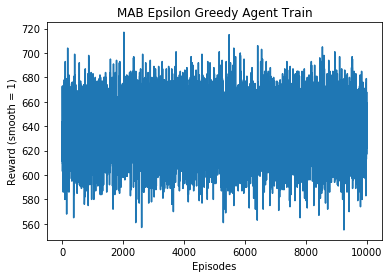

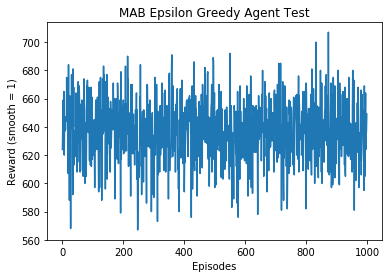

In [20]:
plot_agent_run(eg_train_rewards, "MAB Epsilon Greedy Agent Train", w=1)
plot_agent_run(eg_test_rewards, "MAB Epsilon Greedy Agent Test", w=1)

# Multi Arm Bandit Sample Q function Agent

In [21]:
env.reset()
sp_agent = MultiArmBanditEpsilonSampleProb(env.n_concepts)
sp_agent, sp_train_rewards, sp_test_rewards = run_agent(env, sp_agent, train_eps=train_eps, test_eps=test_eps)


Epsiode 0
Epsiode 100
Epsiode 200
Epsiode 300
Epsiode 400
Epsiode 500
Epsiode 600
Epsiode 700
Epsiode 800
Epsiode 900
Epsiode 1000
Epsiode 1100
Epsiode 1200
Epsiode 1300
Epsiode 1400
Epsiode 1500
Epsiode 1600
Epsiode 1700
Epsiode 1800
Epsiode 1900
Epsiode 2000
Epsiode 2100
Epsiode 2200
Epsiode 2300
Epsiode 2400
Epsiode 2500
Epsiode 2600
Epsiode 2700
Epsiode 2800
Epsiode 2900
Epsiode 3000
Epsiode 3100
Epsiode 3200
Epsiode 3300
Epsiode 3400
Epsiode 3500
Epsiode 3600
Epsiode 3700
Epsiode 3800
Epsiode 3900
Epsiode 4000
Epsiode 4100
Epsiode 4200
Epsiode 4300
Epsiode 4400
Epsiode 4500
Epsiode 4600
Epsiode 4700
Epsiode 4800
Epsiode 4900
Epsiode 5000
Epsiode 5100
Epsiode 5200
Epsiode 5300
Epsiode 5400
Epsiode 5500
Epsiode 5600
Epsiode 5700
Epsiode 5800
Epsiode 5900
Epsiode 6000
Epsiode 6100
Epsiode 6200
Epsiode 6300
Epsiode 6400
Epsiode 6500
Epsiode 6600
Epsiode 6700
Epsiode 6800
Epsiode 6900
Epsiode 7000
Epsiode 7100
Epsiode 7200
Epsiode 7300
Epsiode 7400
Epsiode 7500
Epsiode 7600
Epsiode 770

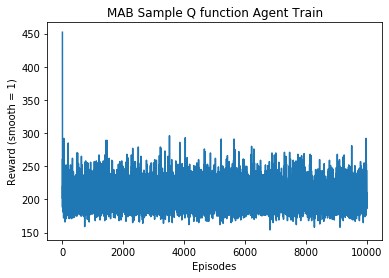

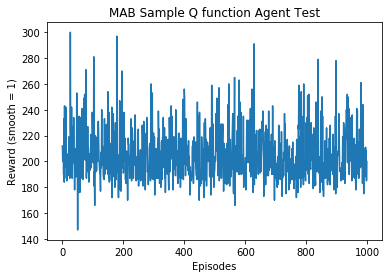

In [22]:
plot_agent_run(sp_train_rewards, "MAB Sample Q function Agent Train", w=1)
plot_agent_run(sp_test_rewards, "MAB Sample Q function Agent Test", w=1)

In [23]:
[e for e in env.questions[10:20]]

[Question(concepts=(4,), difficulty=-0.04234442281562963),
 Question(concepts=(3,), difficulty=2.5228069884381057),
 Question(concepts=(4,), difficulty=2.320231496286795),
 Question(concepts=(2,), difficulty=0.08270130463416446),
 Question(concepts=(3,), difficulty=-0.6491348099589092),
 Question(concepts=(3,), difficulty=-0.8033299174724221),
 Question(concepts=(4,), difficulty=0.4580062565793438),
 Question(concepts=(2,), difficulty=-1.111544643950894),
 Question(concepts=(3,), difficulty=0.05296027139946582),
 Question(concepts=(4,), difficulty=0.6603303142038328)]

In [24]:
sp_agent.q[10:20]

array([0.04266301, 0.05523177, 0.12339297, 0.10239157, 0.04009161,
       0.0683347 , 0.07299634, 0.14926926, 0.01942329, 0.        ])